In [33]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("team_stats_2003_2023.csv")

df = df.dropna(subset=["mov"])

edges = []

threshold = 1.5

# Loop through each season to compare teams
for year in df["year"].unique():
    season_df = df[df["year"] == year]
    for i, row_i in season_df.iterrows():
        for j, row_j in season_df.iterrows():
            if i >= j:
                continue
            if abs(row_i["mov"] - row_j["mov"]) <= threshold:
                edges.append((row_i["team"], row_j["team"]))


In [37]:
# Create graph
G = nx.Graph()
G.add_edges_from(edges)

# Compute centrality metrics
pagerank = nx.pagerank(G)
degree = nx.degree_centrality(G)
betweenness = nx.betweenness_centrality(G, k=30, seed=42)

# Create DataFrame of metrics
metrics_df = pd.DataFrame({
    "Team": list(pagerank.keys()),
    "PageRank": pd.Series(pagerank),
    "DegreeCentrality": pd.Series(degree),
    "BetweennessCentrality": pd.Series(betweenness)
}).sort_values("PageRank", ascending=False).reset_index(drop=True)


In [38]:


# Plotting the graph with node sizes based on PageRank
plt.figure(figsize=(12, 9))
pos = nx.spring_layout(G, k=0.3, seed=42)


<Figure size 1200x900 with 0 Axes>

                   Team  PageRank  DegreeCentrality  BetweennessCentrality
0  Tampa Bay Buccaneers  0.035323          0.828571               0.021858
1  Jacksonville Jaguars  0.035139          0.828571               0.016008
2   Philadelphia Eagles  0.035122          0.828571               0.016672
3         Chicago Bears  0.034854          0.828571               0.014474
4    Cincinnati Bengals  0.034053          0.800000               0.017802
5        Houston Texans  0.032943          0.771429               0.013959
6      Tennessee Titans  0.032890          0.771429               0.016045
7     Green Bay Packers  0.031776          0.742857               0.010432
8   Pittsburgh Steelers  0.031217          0.714286               0.022465
9      Seattle Seahawks  0.031030          0.714286               0.016873


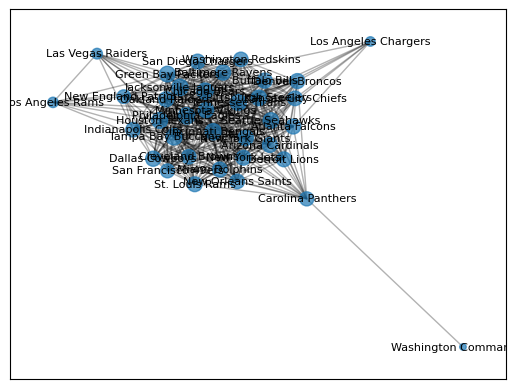

In [41]:
# Scale node sizes by PageRank
node_sizes = [pagerank[node] * 4000 for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)

top_10_pagerank = metrics_df.sort_values(by="PageRank", ascending=False).head(10)
print(top_10_pagerank)


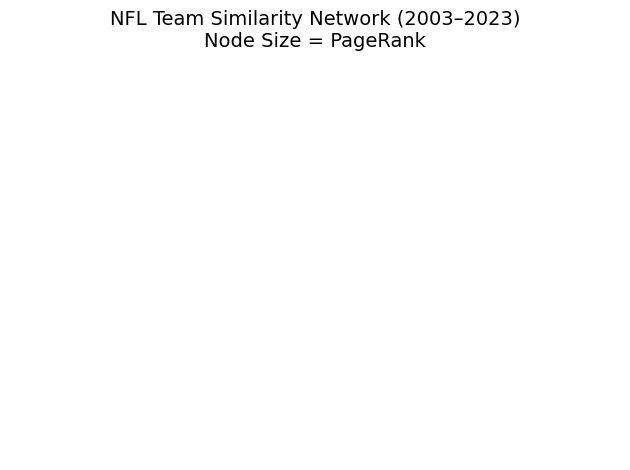

In [40]:
plt.title("NFL Team Similarity Network (2003–2023)\nNode Size = PageRank", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()